<a href="https://colab.research.google.com/github/vuvuyjjii/mining/blob/main/%EB%B6%84%EB%A5%98%EC%8B%A4%EC%8A%B5_2010016_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 주제:연령대, 음주여부, 흡연여부, 신장, 허리둘레, 트리글리세라이드, LDL콜레스테롤가 총콜레스테롤이 고지혈증에 미치는 영향 탐구




In [1]:
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import mglearn

In [4]:
%matplotlib inline
import pandas as pd
import seaborn as sns           # Seaborn 로딩하기
import matplotlib.pyplot as plt # Matplotlib의 pyplot 로딩하기

In [5]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [6]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats
import mglearn

In [8]:
a1 = pd.read_csv("/content/health_data.csv")

print(a1.columns)
display(a1.info())      # 569행의 데이터 - id는 index이므로 생략됨, diagnosis와 30개 변수 (결측치 없음)  
display(a1.head())  

Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석', '데이터공개일자'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)   

None

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [10]:
a2= a1.drop(['기준년도','가입자일련번호','구강검진수검여부','데이터공개일자'],axis=1)
#결측치있는 행 제거 
a2 = a2.dropna(axis=0)

In [34]:
a1['성별코드']=a1['성별코드'].replace({'M':0,'F':1})
a1

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,0,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,1,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,1,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,0,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,1,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,1,13,155,55,83.0,1.2,1.2,...,0.7,20.0,21.0,20.0,No,Yes,0,NaN,NaN,12/29/2021
9996,2020,9997,43,1,11,160,55,77.5,1.0,1.2,...,0.7,24.0,22.0,21.0,No,Yes,1,0.0,0.0,12/29/2021
9997,2020,9998,45,0,12,160,80,93.0,0.6,0.6,...,1.0,22.0,27.0,35.0,No,No,0,NaN,NaN,12/29/2021
9998,2020,9999,27,1,15,155,55,78.0,0.6,1.0,...,1.0,26.0,24.0,21.0,No,No,0,NaN,NaN,12/29/2021


In [35]:
a1['흡연상태']=a1['흡연상태'].replace({'Yes':1,'No':0, 'NotNow':2})
a1

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,0,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,0.0,No,0,NaN,NaN,12/29/2021
1,2020,2,27,1,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,0.0,No,0,NaN,NaN,12/29/2021
2,2020,3,11,1,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,0.0,No,0,NaN,NaN,12/29/2021
3,2020,4,31,0,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,0.0,No,1,0.0,0.0,12/29/2021
4,2020,5,41,1,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,0.0,No,0,NaN,NaN,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,1,13,155,55,83.0,1.2,1.2,...,0.7,20.0,21.0,20.0,0.0,Yes,0,NaN,NaN,12/29/2021
9996,2020,9997,43,1,11,160,55,77.5,1.0,1.2,...,0.7,24.0,22.0,21.0,0.0,Yes,1,0.0,0.0,12/29/2021
9997,2020,9998,45,0,12,160,80,93.0,0.6,0.6,...,1.0,22.0,27.0,35.0,0.0,No,0,NaN,NaN,12/29/2021
9998,2020,9999,27,1,15,155,55,78.0,0.6,1.0,...,1.0,26.0,24.0,21.0,0.0,No,0,NaN,NaN,12/29/2021


In [36]:
a1['음주여부']=a1['음주여부'].replace({'Yes':1,'No':0})
a1

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,0,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,0.0,0.0,0,NaN,NaN,12/29/2021
1,2020,2,27,1,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,0.0,0.0,0,NaN,NaN,12/29/2021
2,2020,3,11,1,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,0.0,0.0,0,NaN,NaN,12/29/2021
3,2020,4,31,0,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,0.0,0.0,1,0.0,0.0,12/29/2021
4,2020,5,41,1,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,0.0,0.0,0,NaN,NaN,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,1,13,155,55,83.0,1.2,1.2,...,0.7,20.0,21.0,20.0,0.0,1.0,0,NaN,NaN,12/29/2021
9996,2020,9997,43,1,11,160,55,77.5,1.0,1.2,...,0.7,24.0,22.0,21.0,0.0,1.0,1,0.0,0.0,12/29/2021
9997,2020,9998,45,0,12,160,80,93.0,0.6,0.6,...,1.0,22.0,27.0,35.0,0.0,0.0,0,NaN,NaN,12/29/2021
9998,2020,9999,27,1,15,155,55,78.0,0.6,1.0,...,1.0,26.0,24.0,21.0,0.0,0.0,0,NaN,NaN,12/29/2021


In [37]:
a1.dropna(inplace=True)
a1.isnull().sum()

기준년도           0
가입자일련번호        0
시도코드           0
성별코드           0
연령대코드(5세단위)    0
신장(5Cm단위)      0
체중(5Kg 단위)     0
허리둘레           0
시력(좌)          0
시력(우)          0
청력(좌)          0
청력(우)          0
수축기혈압          0
이완기혈압          0
식전혈당(공복혈당)     0
총콜레스테롤         0
트리글리세라이드       0
HDL콜레스테롤       0
LDL콜레스테롤       0
혈색소            0
요단백            0
혈청크레아티닌        0
(혈청지오티)AST     0
(혈청지오티)ALT     0
감마지티피          0
흡연상태           0
음주여부           0
구강검진수검여부       0
치아우식증유무        0
치석             0
데이터공개일자        0
dtype: int64

In [11]:
sad = []
for row in a2['총콜레스테롤'] : 
  if row <= 250:
    sad.append('yes')
  else:
   sad.append('noyes')

a2['sad'] = sad
a2

,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,치아우식증유무,치석,sad
6,44,M,9,165,80,93.0,0.8,0.7,1,2,...,1.0,0.7,18.0,20.0,35.0,Yes,Yes,0.0,1.0,yes
16,30,M,11,160,65,90.0,0.6,0.6,1,1,...,1.0,1.0,29.0,54.0,24.0,No,Yes,0.0,1.0,yes
21,41,F,11,155,50,65.9,0.7,1.0,1,1,...,1.0,0.8,24.0,14.0,12.0,No,No,0.0,0.0,noyes
27,11,M,17,155,60,82.0,0.5,0.7,1,1,...,1.0,1.4,33.0,22.0,29.0,No,Yes,0.0,0.0,yes
47,26,M,16,165,65,94.0,1.5,0.6,2,2,...,1.0,1.0,28.0,20.0,43.0,No,Yes,0.0,0.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,30,M,9,180,70,87.5,1.2,0.9,1,1,...,1.0,0.9,22.0,21.0,19.0,No,Yes,0.0,1.0,yes
9963,41,F,13,160,75,107.4,0.8,0.8,1,1,...,1.0,0.8,20.0,15.0,14.0,No,Yes,1.0,1.0,yes
9965,45,F,12,155,60,80.0,1.5,1.0,1,1,...,1.0,0.6,22.0,9.0,29.0,No,No,0.0,0.0,yes
9967,11,M,12,170,80,90.0,0.9,0.9,1,1,...,1.0,0.7,27.0,36.0,66.0,NotNow,Yes,0.0,2.0,noyes


In [15]:
a3 = a2.drop(['시도코드'], axis=1)

In [ ]:
a1.describe()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
count,1249.0,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,...,1249.000000,1249.000000,1249.00000,1249.000000,1249.000000,1249.000000,1249.000000,1249.0,1249.000000,1249.000000
mean,2020.0,5160.337070,33.387510,0.457966,11.639712,161.737390,63.799039,82.505685,0.925620,0.904884,...,1.110488,0.881105,26.86309,26.672538,35.453163,0.636509,0.642114,1.0,0.164131,0.591673
std,0.0,2841.021877,12.372829,0.498430,2.173535,8.995185,12.719186,9.844860,0.652522,0.476381,...,0.503794,0.356008,13.92527,23.392743,35.973387,0.830593,0.479570,0.0,0.370543,0.588180
min,2020.0,7.000000,11.000000,0.000000,9.000000,130.000000,30.000000,57.000000,0.100000,0.100000,...,1.000000,0.400000,8.00000,2.000000,3.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,2020.0,2761.000000,27.000000,0.000000,10.000000,155.000000,55.000000,75.500000,0.700000,0.700000,...,1.000000,0.700000,20.00000,16.000000,17.000000,0.000000,0.000000,1.0,0.000000,0.000000
50%,2020.0,5215.000000,41.000000,0.000000,12.000000,160.000000,65.000000,83.000000,0.900000,0.900000,...,1.000000,0.900000,24.00000,21.000000,24.000000,0.000000,1.000000,1.0,0.000000,1.000000
75%,2020.0,7683.000000,43.000000,1.000000,13.000000,170.000000,70.000000,89.000000,1.000000,1.000000,...,1.000000,1.000000,29.00000,31.000000,39.000000,1.000000,1.000000,1.0,0.000000,1.000000
max,2020.0,9975.000000,49.000000,1.000000,18.000000,190.000000,120.000000,121.200000,9.900000,9.900000,...,6.000000,8.700000,265.00000,477.000000,445.000000,2.000000,1.000000,1.0,1.000000,2.000000


yes      1106
noyes     143
Name: sad, dtype: int64


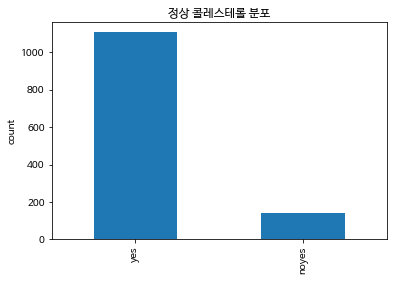

In [16]:
print(a2['sad'].value_counts())
a3['sad'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('정상 콜레스테롤 분포')
plt.show()

In [27]:
from sklearn.preprocessing import LabelEncoder
s = (a3.dtypes == 'object')
object_cols = list(s[s].index)

print("문자형인 변수가 있는 컬럼:", object_cols)

문자형인 변수가 있는 컬럼: []


In [28]:
LE=LabelEncoder()

for i in object_cols:
   a3[i]=a3[[i]].apply(LE.fit_transform)
    
print("모든 변수가 숫자형입니다!")

모든 변수가 숫자형입니다!


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [29]:
X = a3.drop(['sad'], axis = 1)  
y = a3['sad']

In [30]:
X

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,치아우식증유무,치석
6,1,9,165,80,93.0,0.8,0.7,1,2,112.0,...,15.7,1.0,0.7,18.0,20.0,35.0,2,1,0.0,1.0
16,1,11,160,65,90.0,0.6,0.6,1,1,138.0,...,16.6,1.0,1.0,29.0,54.0,24.0,0,1,0.0,1.0
21,0,11,155,50,65.9,0.7,1.0,1,1,114.0,...,11.8,1.0,0.8,24.0,14.0,12.0,0,0,0.0,0.0
27,1,17,155,60,82.0,0.5,0.7,1,1,139.0,...,14.3,1.0,1.4,33.0,22.0,29.0,0,1,0.0,0.0
47,1,16,165,65,94.0,1.5,0.6,2,2,110.0,...,16.3,1.0,1.0,28.0,20.0,43.0,0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,1,9,180,70,87.5,1.2,0.9,1,1,108.0,...,15.1,1.0,0.9,22.0,21.0,19.0,0,1,0.0,1.0
9963,0,13,160,75,107.4,0.8,0.8,1,1,124.0,...,14.0,1.0,0.8,20.0,15.0,14.0,0,1,1.0,1.0
9965,0,12,155,60,80.0,1.5,1.0,1,1,135.0,...,13.8,1.0,0.6,22.0,9.0,29.0,0,0,0.0,0.0
9967,1,12,170,80,90.0,0.9,0.9,1,1,140.0,...,15.0,1.0,0.7,27.0,36.0,66.0,1,1,0.0,2.0


In [40]:
y

6       1
16      1
21      0
27      1
47      1
       ..
9954    1
9963    1
9965    1
9967    0
9974    1
Name: sad, Length: 1249, dtype: int64

##의사결정나무

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 1.000


In [42]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 1.000


In [ ]:
음주를 하고, 담배를 피면 총콜레스테롤 수치가 높을 것이다. 라고 하면 음주여부랑 흡연여부가 독립변수고 총콜레스테롤이 종속변수인거죠??
새로운 데이터 만들라고 하는데 3개로만 만들어도 

### DecisionTreeClassifier
의사결정나무 모델 생성시 이용되는 주요 파라미터

- criterion: 분할시 순수도 계산 방법 (gini, entropy, default: gini)
- splitter: 각 노드에서 분할을 선택하는 데 사용되는 전략 (best, random, default: best)
- max_depth: 나무의 최대 깊이 (default: none, 제한 없음)
- min_samples_split: 자식 노드를 분할하는데 필요한 최소 샘플 수 (default: 2)
- min_samples_leaf: 마지막 잎 노드에 있어야 할 최소 샘플 수 (default: 1)
- max_features: 각 노드에서 분할에 사용할 변수의 최대 수 (auto, sqrt, log2, default: None)
- random_state: 난수 seed 설정 (max_features 만큼의 변수 선택시)
- max_leaf_nodes: 잎 노드의 최대수 (default: none)
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.*html*

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


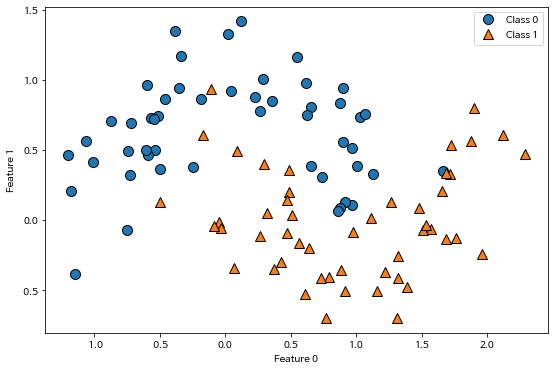

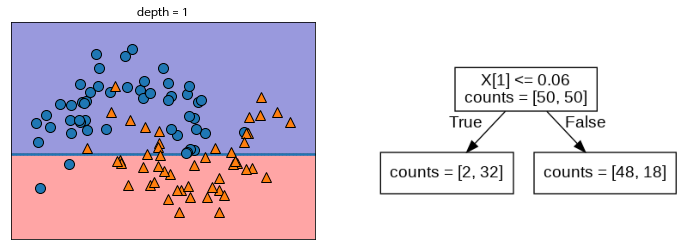

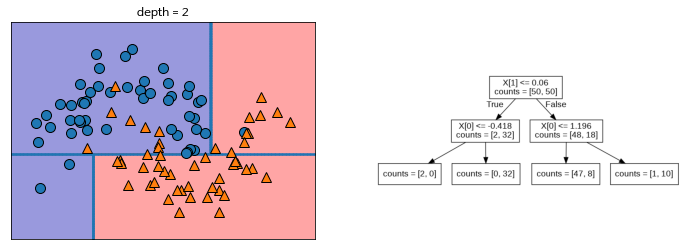

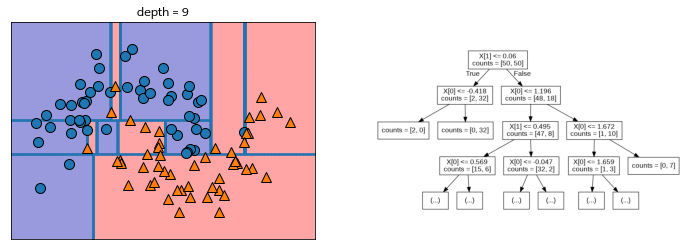

In [28]:
mglearn.plots.plot_tree_progressive()

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

data = a3
X = a3.iloc[:, 1:]  # 30개 변수 
y = a3.iloc[:, 0]   # target 변수 diagnosis 

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.912


In [47]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.955
시험용 데이터 정확도: 0.920


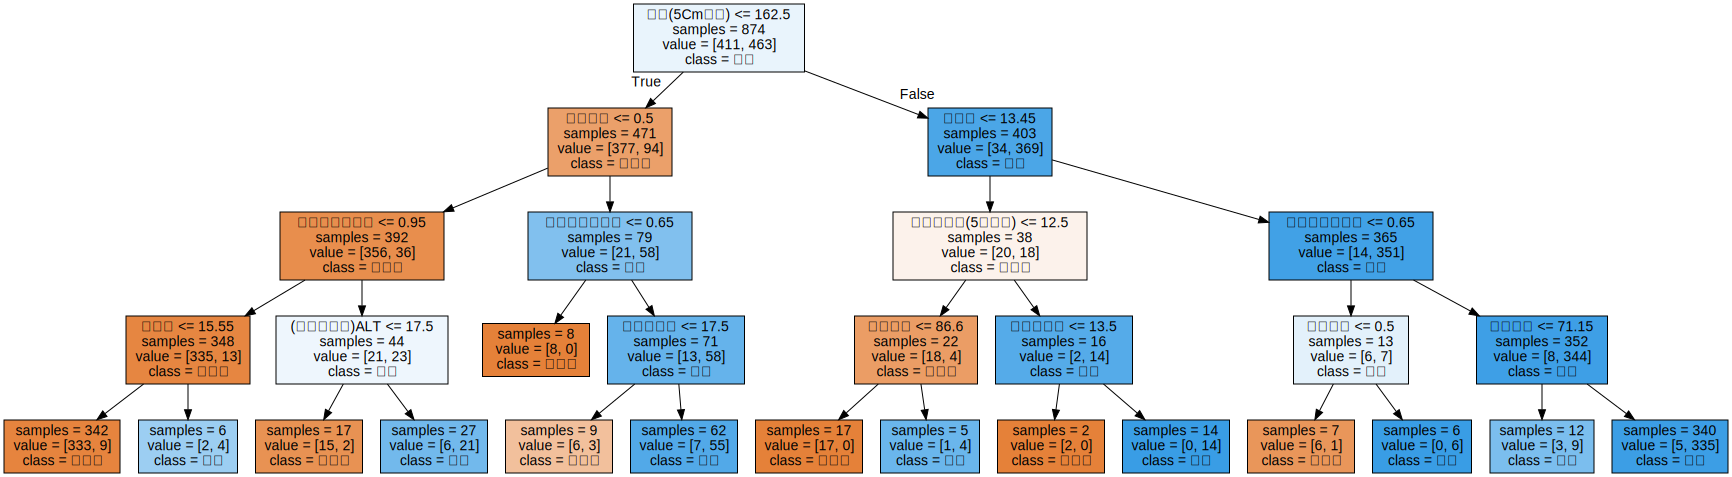

In [52]:
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "비정상", "정상"],
                feature_names=a3.columns[1:], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [50]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.02416957 0.60468019 0.         0.01691201 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.05762901 0.         0.08913289
 0.         0.02468513 0.02258984 0.16020135 0.         0.
 0.         0.        ]


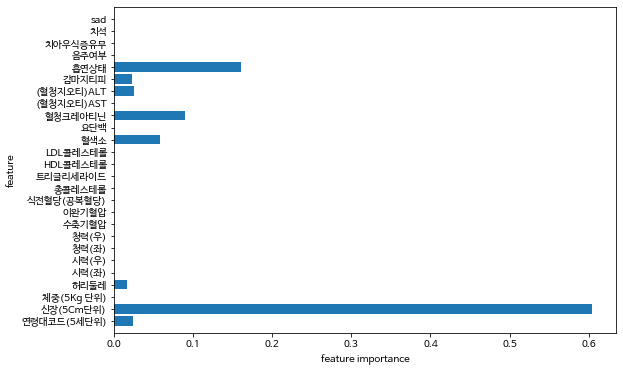

In [51]:
import numpy as np

def plot_feature_importances_a1(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(a3.columns[1:])  # 30개 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), a3.columns[1:])   # 30개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_a1(tree)

In [70]:
X_train[['신장(5Cm단위)','흡연상태']]
y_train

6704    0
9579    0
7625    1
3434    0
7602    0
       ..
6466    1
551     0
3088    1
798     0
6392    1
Name: 성별코드, Length: 874, dtype: int64

##랜덤포레스트

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


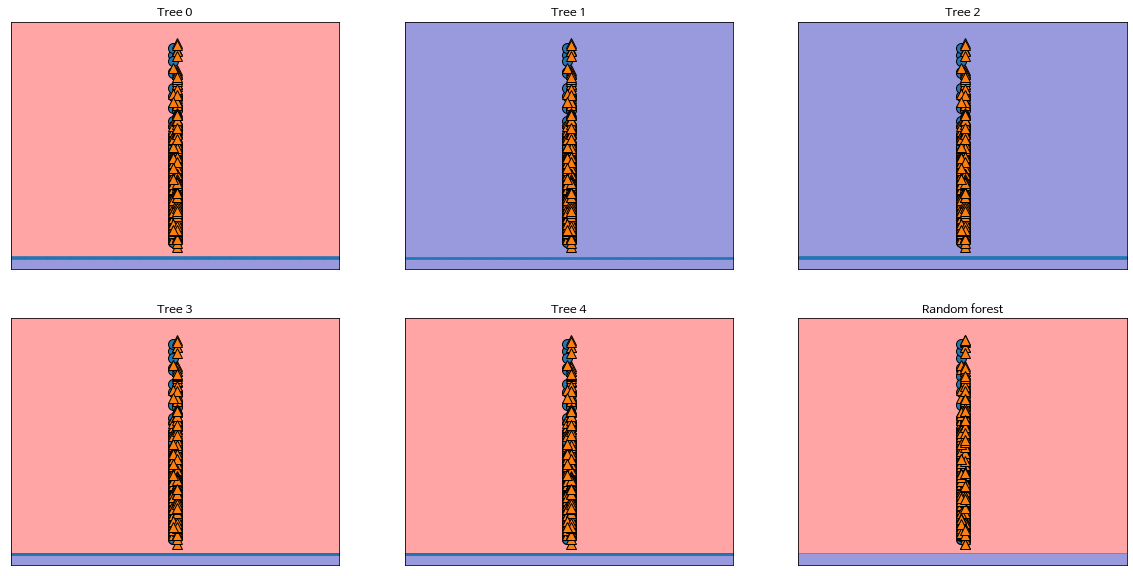

In [69]:
from sklearn.ensemble import RandomForestClassifier

# '허리둘레','체중' 변수만 이용하여 
# 5개의 나무를 만드는 예 (n_estimators = 5, 실제는 수백개의 트리를 만든다)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train[['신장(5Cm단위)','흡연상태']], y_train)

# 5개 나무 각각의 분류 경계를 그림 (서로 모양이 많이 다르다)
# 2차원으로 나무의 결과를 보여주기 위한 코드로 mglearn의 함수들을 이용 - 여기서는 설명 생략
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train[['음주여부','트리글리세라이드']].values, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train[['음주여부','트리글리세라이드']].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(X['음주여부'], X['트리글리세라이드'], y)
plt.show()

In [56]:
# 30개 변수를 모두 이용하여 100개의 나무 생성 (정확도가 높아짐)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.960


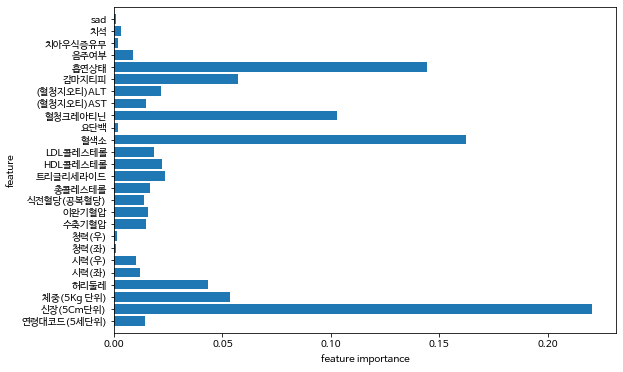

In [57]:
# 단일 의사결정나무의 경우보다 많은 변수(feature)들이 사용됨
plot_feature_importances_df(forest)

In [61]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean()))

Accuracy
Decision tree:  [0.90909091 0.85227273 0.90909091 0.88636364 0.93103448 0.91954023
 0.85057471 0.8045977  0.85057471 0.88505747]
Random forest:  [0.88636364 0.96590909 0.94318182 0.93181818 0.94252874 0.95402299
 0.90804598 0.94252874 0.95402299 0.98850575]
Accuracy mean
Decision tree :0.880
Random forest :0.942


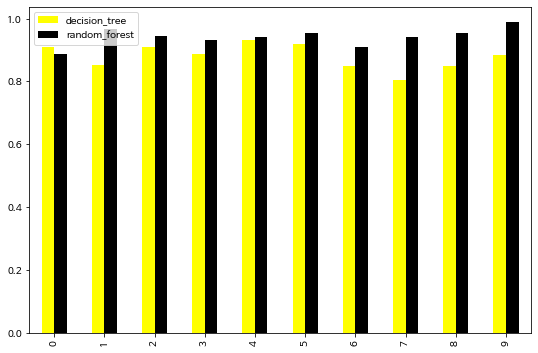

In [66]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))


df.plot(kind = 'bar', color = ['yellow','black'])

In [64]:
df

,decision_tree,random_forest
0,0.909091,0.886364
1,0.852273,0.965909
2,0.909091,0.943182
3,0.886364,0.931818
4,0.931034,0.942529
5,0.919540,0.954023
6,0.850575,0.908046
7,0.804598,0.942529
8,0.850575,0.954023
9,0.885057,0.988506


##인사이트 도출


1. 중요변수는 신장(5cm단위), 흡연상태, 혈청크레아티닌 순으로 여러 요소 중 이 세가지 변수는 총콜레스테롤에 큰 영향을 미친다.
2. 의사결정나무의 정확도(0.880), 랜덤포레스트의 정확도는(0.942)로 랜덤포레스트가 더 높다. 
